# Slide 14 - Feature Visualization

In [1]:
import sys
ROOT = "/Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/src/lucent"
if ROOT not in sys.path: sys.path.insert(0, ROOT)

from lucent.modelzoo import inceptionv1


In [2]:
import torch
from torchvision.models import resnet50, googlenet
from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo import inceptionv1 

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = inceptionv1.inceptionv1(pretrained=True)
#model = resnet50(pretrained=True)
#model = googlenet(pretrained=True)
_ = model.to(device).eval()

Similar to the [Distill Article](https://distill.pub/2017/feature-visualization/), this tutorial will be focused on the same InceptionV1 model, also known as [GoogLeNet](https://research.google.com/pubs/archive/43022.pdf).


100%|██████████| 512/512 [07:16<00:00,  1.17it/s]



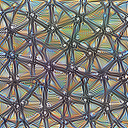

In [4]:
goal = "mixed4a:11"
_ = render.render_vis(model, goal, show_inline=True, save_image=f"Visualization_{goal}.pdf")

In [5]:
import sys
ROOT = "/Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/src/lucent"
if ROOT not in sys.path:
    sys.path.insert(0, ROOT)

from lucent.modelzoo import inceptionv1
from lucent.optvis import render

model = inceptionv1.inceptionv1(pretrained=True).eval()
obj = "mixed4a:11"

pdf_out = "/Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/figures/feature_progression_mixed4a_11random_in_fourier.pdf"

imgs = render.render_feature_with_snapshots(
    model,
    obj,
    snapshot_steps=[0, 4, 48, 2048],
    img_size=224,
    device="auto",  # cuda > mps > cpu
    pdf_path=pdf_out,
    left_text="Starting from random noise in fourier space, we optimize an image to activate a particular neuron (layer mixed4a, unit 11).",
)
print("Saved PDF:", pdf_out)


100%|██████████| 2048/2048 [1:34:50<00:00,  2.78s/it]    


Saved PDF: /Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/figures/feature_progression_mixed4a_11random_in_fourier.pdf


## Pure Gaussian Noise (in Pixel Space)

In [6]:
import sys
ROOT = "/Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/src/lucent"
if ROOT not in sys.path:
    sys.path.insert(0, ROOT)

from lucent.modelzoo import inceptionv1
from lucent.optvis import render

model = inceptionv1.inceptionv1(pretrained=True).eval()
obj = "mixed4a:11"

pdf_out = "/Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/figures/feature_progression_mixed4a_11_random_in_pixel.pdf"

imgs = render.render_feature_with_snapshots(
    model,
    obj,
    snapshot_steps=[0, 4, 48, 2048],
    img_size=224,
    device="auto",  # cuda > mps > cpu
    pdf_path=pdf_out,
    left_text="Starting from random noise in pixel space, we optimize an image to activate a particular neuron (layer mixed4a, unit 11).",
    fft = False
)
print("Saved PDF:", pdf_out)


100%|██████████| 2048/2048 [6:51:53<00:00, 12.07s/it]    

Saved PDF: /Users/juliawenkmann/Documents/CodingProjects/damien/sophia_summit/sophia_summit_presentation/figures/feature_progression_mixed4a_11_random_in_pixel.pdf
